In [151]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.fft import fft
import os
from scipy.fftpack import fft
from scipy.io import loadmat
from sklearn.decomposition import PCA


In [152]:
# Load the EEG data
in_dir = r'D:\Imputed_file'    # EEG data folder
miscDir = r'C:\Users\napat\Documents\GitHub\BCC_2024\Code\Misc'     # Misc folder (if necessary)

fs = 125
sec_start = 15
epochLenSec = 4 * 60   
epoch_len_samp = fs * epochLenSec
song_idx = 23


In [160]:
# Function to apply median DC correction
def median_dc_correct_all_trials(data):
    return data - np.median(data, axis=1, keepdims=True)

def plot_combined_frequency_domain(data, fs, tempoHz, song_idx=1, num_channels_first_plot=10):
    # Step 1: Reduce the number of channels for the first plot only
    selected_channels = data[::max(1, data.shape[0] // num_channels_first_plot), :, :]  # Select fewer channels for first plot

    T = data.shape[1]
    freq_axis = np.fft.fftfreq(T, d=1/fs)[:T // 2]

    # Compute FFT for the selected channels for the first plot
    mean_channels = np.mean(selected_channels, axis=2)  # Mean across trials
    fft_data = np.abs(fft(mean_channels, axis=1))[:, :T // 2]

    # Filter to 0-15 Hz range
    valid_freqs = freq_axis <= 15
    freq_axis = freq_axis[valid_freqs]
    fft_data = fft_data[:, valid_freqs]

    # Create the combined figure
    fig, axs = plt.subplots(2, 1, figsize=(20, 15))  # Two plots stacked vertically

    # First plot (Mean Frequency-Domain Signal using fewer channels)
    for ch in range(fft_data.shape[0]):
        axs[0].bar(freq_axis, fft_data[ch, :], width=0.2, color='black', zorder=1)

    axs[0].axvline(x=tempoHz / 4, color='blue', linestyle='--', linewidth=6, zorder=0)
    axs[0].axvline(x=tempoHz / 2, color='orange', linestyle='--', linewidth=6, zorder=0)
    axs[0].axvline(x=tempoHz, color='green', linestyle='--', linewidth=6, zorder=0)
    axs[0].axvline(x=tempoHz * 2, color='red', linestyle='--', linewidth=6, zorder=0)
    axs[0].axvline(x=tempoHz * 4, color='purple', linestyle='--', linewidth=6, zorder=0)
    axs[0].axvline(x=tempoHz * 8, color='brown', linestyle='--', linewidth=6, zorder=0)

    # Customize appearance of the first plot
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].spines['left'].set_visible(False)
    axs[0].spines['bottom'].set_visible(False)
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[0].set_title(f'Song 1', fontsize=60)
    axs[0].set_ylabel('ME', fontsize=48)

    # Second plot (PC1 Frequency-Domain Signal using all channels)
    pca = PCA(n_components=1)
    pca_data = pca.fit_transform(data.reshape(data.shape[0], -1).T).T[0]  # Use all channels for PCA (PC1)
    fft_pca = np.abs(fft(pca_data))[:T // 2]
    fft_pca = fft_pca[valid_freqs]

    axs[1].bar(freq_axis, fft_pca, width=0.2, color='black', zorder=1)

    axs[1].axvline(x=tempoHz / 4, color='blue', linestyle='--', linewidth=6, zorder=0)
    axs[1].axvline(x=tempoHz / 2, color='orange', linestyle='--', linewidth=6, zorder=0)
    axs[1].axvline(x=tempoHz, color='green', linestyle='--', linewidth=6, zorder=0)
    axs[1].axvline(x=tempoHz * 2, color='red', linestyle='--', linewidth=6, zorder=0)
    axs[1].axvline(x=tempoHz * 4, color='purple', linestyle='--', linewidth=6, zorder=0)
    axs[1].axvline(x=tempoHz * 8, color='brown', linestyle='--', linewidth=6, zorder=0)

    # Customize appearance of the second plot
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['left'].set_visible(False)
    axs[1].spines['bottom'].set_visible(False)
    axs[1].set_xticks([0, 5, 10])
    axs[1].tick_params(axis='x', length=10, width=2)  
    axs[1].set_xticklabels([0, 5, 10], fontsize=40)
    axs[1].set_yticks([])
    axs[1].set_ylabel('PC1', fontsize=48)

    # plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


In [ ]:
# Load the tempos
tempo_data = sio.loadmat(os.path.join(miscDir, 'tempoHz.mat'))
tempoHz = tempo_data['tempoHz'].flatten()

In [158]:
# Initialize list to store trial mean data
trialMeanData = []

currFn = f'song{song_idx}_Imputed.mat'
print(f'Loading {currFn}...')
data = sio.loadmat(os.path.join(in_dir, currFn))
tempX_0 = data[f'data{song_idx}']

# Assuming a custom function medianDCCorrectAllTrialsInStruct exists
tempX_dc = median_dc_correct_all_trials(tempX_0)
tempX_epoch = tempX_dc[:, sec_start * fs:(sec_start * fs + epoch_len_samp), :]

# Take mean of data across trials
trialMeanData.append(np.mean(tempX_epoch, axis=2))  
  
trialMeanData = np.array(trialMeanData)

Loading song23_Imputed.mat...


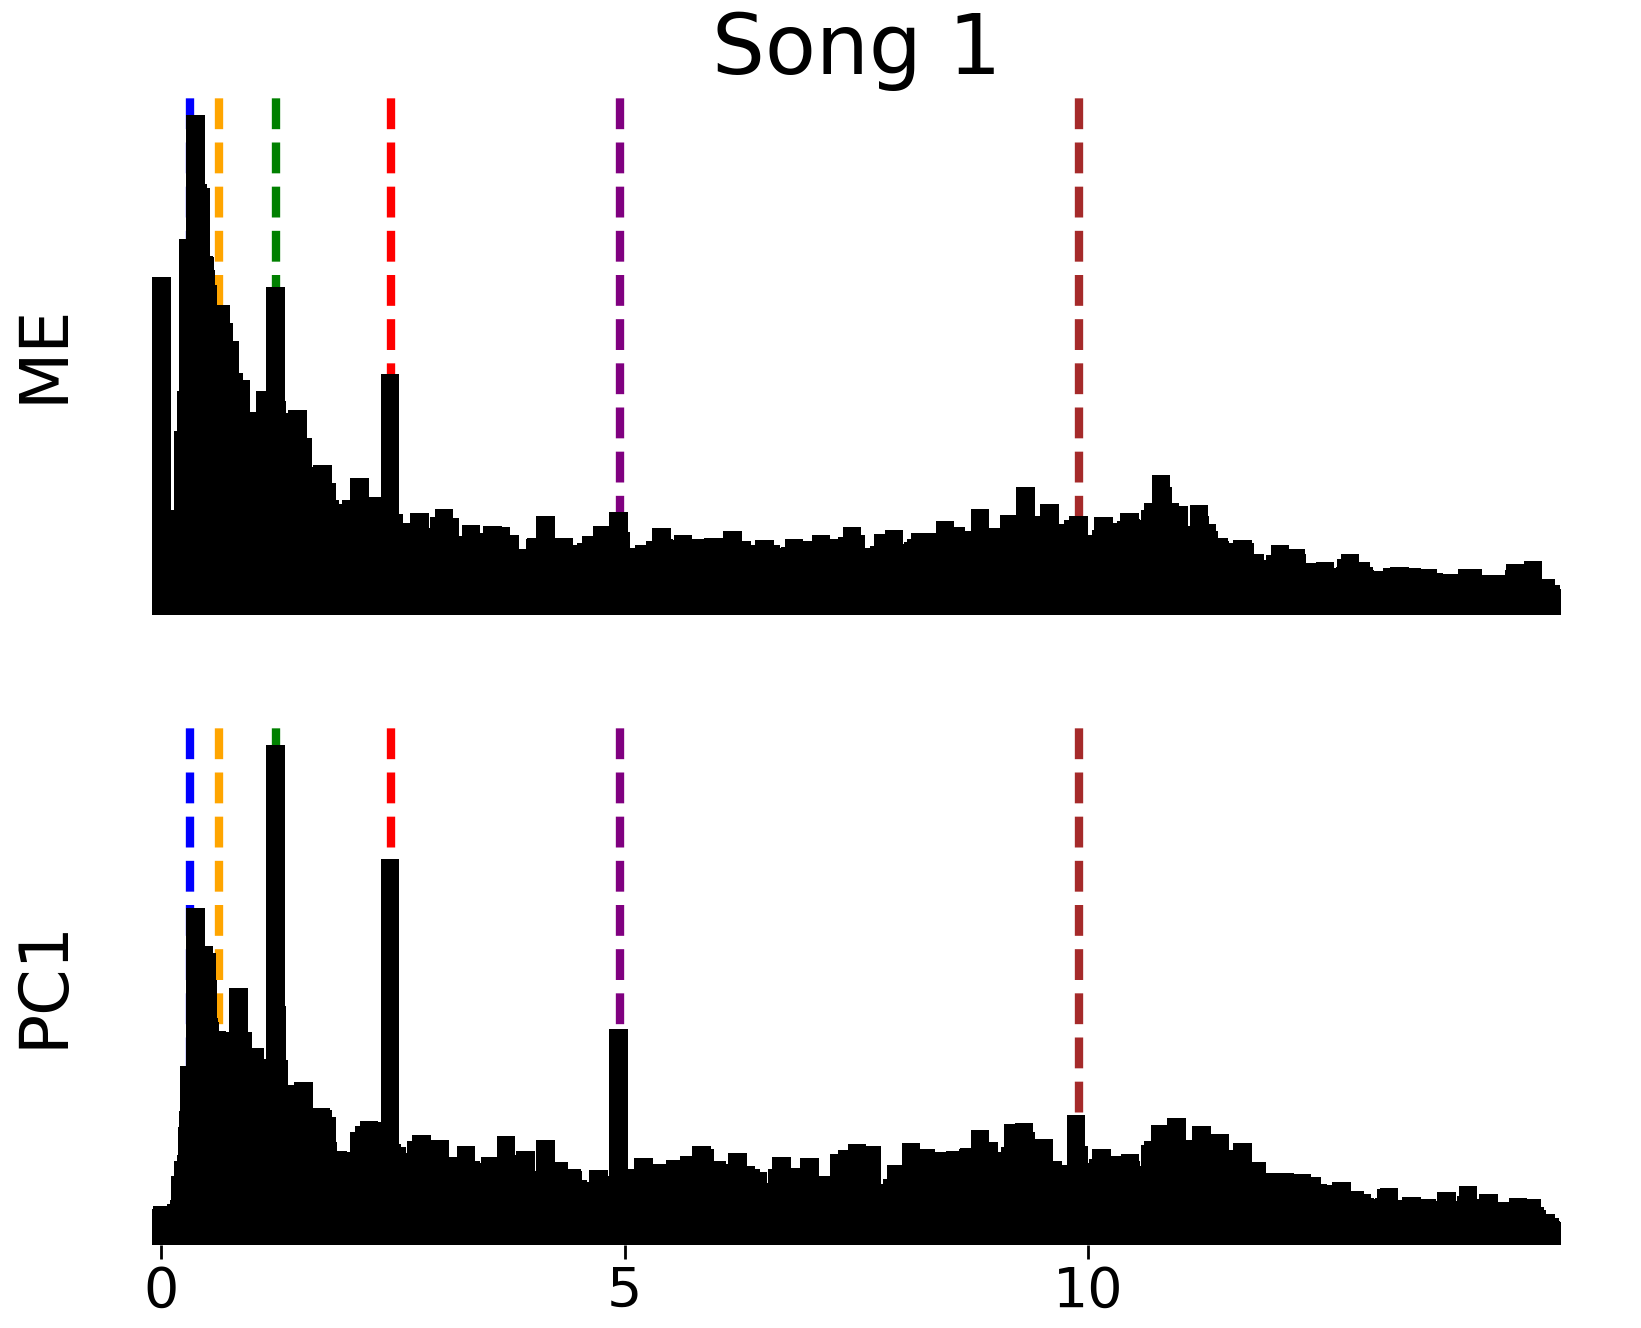

In [161]:
plot_combined_frequency_domain(tempX_epoch, fs,tempoHz[2], song_idx=song_idx)